<a href="https://colab.research.google.com/github/Talizg03/weather/blob/main/29_1_25_project_improve_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

df = pd.read_csv("Train.csv")
#print(df.head())
df.head()

Saving Train.csv to Train (1).csv


<ipython-input-9-1280e8b6c072>:5: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

In [11]:
print(df.shape)

(401125, 53)


In [13]:
print(X.isnull().sum())  # Check for NaNs in features
print(y.isnull().sum())  # Check for NaNs in target variable


SalesID                          0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                        0
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc                  0
fiModelSeries                    0
fiModelDescriptor                0
ProductSize                      0
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                     0
Enclosure                        0
Forks                            0
Pad_Type                         0
Ride_Control                     0
Stick                            0
Transmission                     0
Turbocharged                     0
Blade_Extension                  0
Blade_Width         

In [17]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample dataframe (replace this with your actual dataframe)
# df = pd.read_csv('your_dataset.csv')

def train_model(X, y):
    # Process categorical columns (convert to category codes)
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = X[col].astype('category')
        if X[col].dtype == 'category':
            X[col] = X[col].cat.codes

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

    # Split the data
X = df.drop(columns=['SalePrice','auctioneerID','MachineHoursCurrentMeter'])
y = df['SalePrice']

# Call the train_model function to split data and process categorical variables
X_train, X_test, y_train, y_test = train_model(X, y)  # Correct function call

# Train the model (for example, Linear Regression here)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def RMSE(y_, y_pred_):
    return ((y_ - y_pred_) ** 2).mean() ** 0.5

print(f'Train RMSE: {RMSE(y_train, y_train_pred):.3f}')
print(f'Test RMSE: {RMSE(y_test, y_test_pred):.3f}')



Train RMSE: 17643.711
Test RMSE: 17426.864


In [20]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_jobs=-1)
model = model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def RMSE(y_, y_pred_):
    return ((y_ - y_pred_) ** 2).mean() ** 0.5

print(f'Train RMSE: {RMSE(y_train, y_train_pred):.3f}')
print(f'Test RMSE: {RMSE(y_test, y_test_pred):.3f}')

Train RMSE: 3554.144
Test RMSE: 9489.558


In [21]:
dict(zip(model.feature_names_in_, model.feature_importances_))
fi = pd.Series(model.feature_importances_, index=model.feature_names_in_)
fi = fi.sort_values(ascending=False)
fi

,0
YearMade,0.250140
ProductSize,0.228952
SalesID,0.088467
fiBaseModel,0.073404
fiSecondaryDesc,0.051825
saledate,0.039017
fiProductClassDesc,0.038490
MachineID,0.037695
ModelID,0.032741
Coupler_System,0.029802


In [23]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample dataframe (replace this with your actual dataframe)
# df = pd.read_csv('your_dataset.csv')

def train_model(X, y):
    # Process categorical columns (convert to category codes)
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = X[col].astype('category')
        if X[col].dtype == 'category':
            X[col] = X[col].cat.codes

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

    # Split the data
X = df.drop(columns=['SalePrice','auctioneerID','MachineHoursCurrentMeter','Hydraulics_Flow','Grouser_Tracks','Turbocharged'])
y = df['SalePrice']

# Call the train_model function to split data and process categorical variables
X_train, X_test, y_train, y_test = train_model(X, y)  # Correct function call

# Train the model (for example, Linear Regression here)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def RMSE(y_, y_pred_):
    return ((y_ - y_pred_) ** 2).mean() ** 0.5

print(f'Train RMSE: {RMSE(y_train, y_train_pred):.3f}')
print(f'Test RMSE: {RMSE(y_test, y_test_pred):.3f}')



Train RMSE: 17649.486
Test RMSE: 17433.997


In [24]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_jobs=-1)
model = model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def RMSE(y_, y_pred_):
    return ((y_ - y_pred_) ** 2).mean() ** 0.5

print(f'Train RMSE: {RMSE(y_train, y_train_pred):.3f}')
print(f'Test RMSE: {RMSE(y_test, y_test_pred):.3f}')

Train RMSE: 3554.986
Test RMSE: 9489.622


In [ ]:
y_test == y_test_pred # True predictions
print('Correct predictions:', (y_test == y_test_pred).sum(), f", {(y_test == y_test_pred).mean():.2%}")
print('Incorrect predictions:', (y_test != y_test_pred).sum(), f", {(y_test != y_test_pred).mean():.2%}")

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd



# Assuming y is your target variable and X are your features
# Log transform the target variable (make sure y has positive values)
y_ = np.log(y)  # apply logarithmic transformation to target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.2, random_state=42)

# Train the model (assuming you already have a model, like RandomForestRegressor)
model = RandomForestRegressor(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions_log = model.predict(X_test)

# If you want to get predictions on the original scale, use the inverse of the log (exponentiation)
predictions_original_scale = np.exp(predictions_log)

# Example: Predicting on a specific test instance (e.g., the first test sample)
example_prediction_log = model.predict(X_test.iloc[[0]])  # Prediction in log scale
example_prediction_original = np.exp(example_prediction_log)  # Convert back to original scale

print("Log-transformed prediction:", example_prediction_log)
print("Original scale prediction:", example_prediction_original)

Log-transformed prediction: [10.05577659]
Original scale prediction: [23289.93531888]


Mean Absolute Error: 5979.795610723171
Mean Squared Error: 93170441.67219615
Root Mean Squared Error: 9652.483704839711


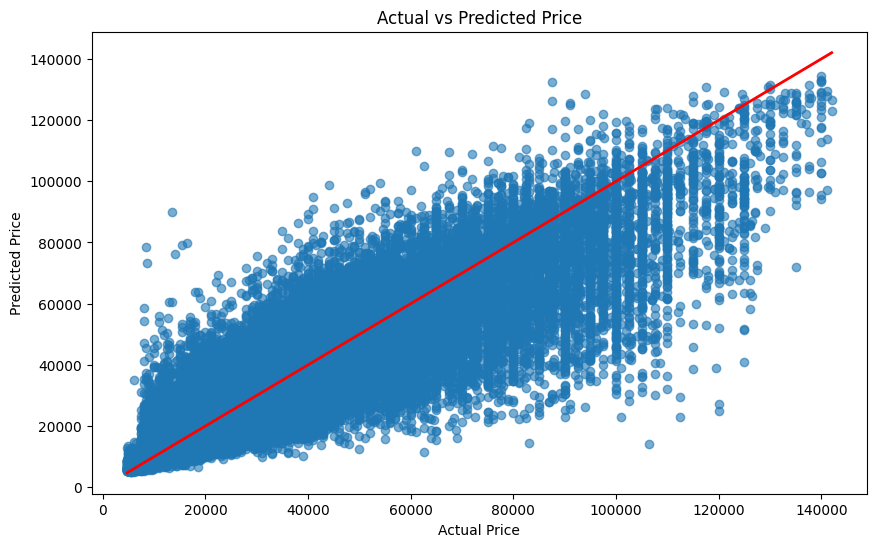

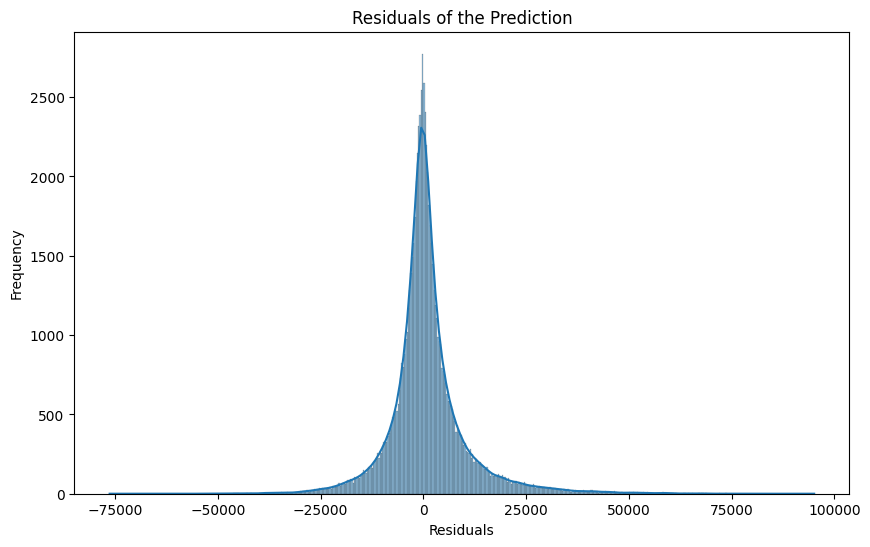

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

# Log-transform the target variable
y_ = np.log(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.2, random_state=42)

# Scale features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_log = model.predict(X_test_scaled)

# Convert the log predictions back to the original scale
y_pred = np.exp(y_pred_log)

# Evaluate model performance
mae = mean_absolute_error(np.exp(y_test), y_pred)
mse = mean_squared_error(np.exp(y_test), y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), y_pred, alpha=0.6)
plt.plot([min(np.exp(y_test)), max(np.exp(y_test))], [min(np.exp(y_test)), max(np.exp(y_test))], color='red', lw=2)
plt.title("Actual vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

# Plot residuals
residuals = np.exp(y_test) - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals of the Prediction")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Optionally, you can apply cross-validation
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation Mean Squared Error: {-cross_val_scores.mean()}")

